In [79]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_csv("reports.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%d %B %Y')
df['Day'] = df['Date'].dt.day
df['DayName'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayName'] = pd.Categorical(df['DayName'], categories=days_order, ordered=False)

In [87]:
#What is the total revenue generated by each store over the entire period?
success_order = df[df.Status==True]
store_total_revenue = success_order.groupby("StoreName").Cost.sum()
# store_total_revenue

In [81]:
#Which store has the highest average order value?
average_order_value_by_store = success_order.groupby('StoreName').Cost.mean()
max_avg_order_value_store = average_order_value_by_store.idxmax()
max_avg_order_value = average_order_value_by_store.max()

In [82]:
#How does the revenue trend look over time (monthly/yearly)?
monthly_revenue = success_order.groupby("Month").Cost.sum()
yearly_revenue = success_order.groupby("Year").Cost.sum()
month_list = monthly_revenue.index.to_list()

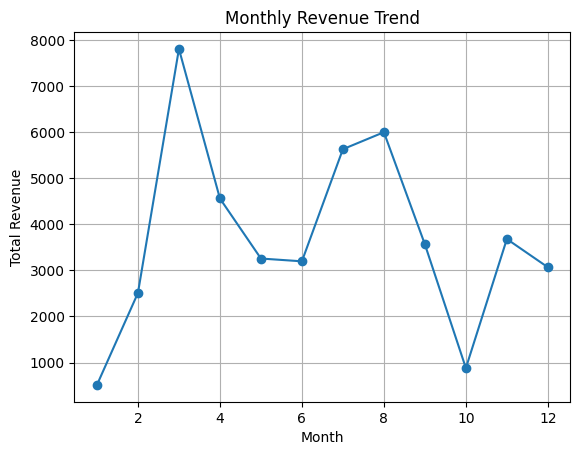

In [83]:
from matplotlib import pyplot as plt
plt.plot(month_list, monthly_revenue.to_list(),marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)

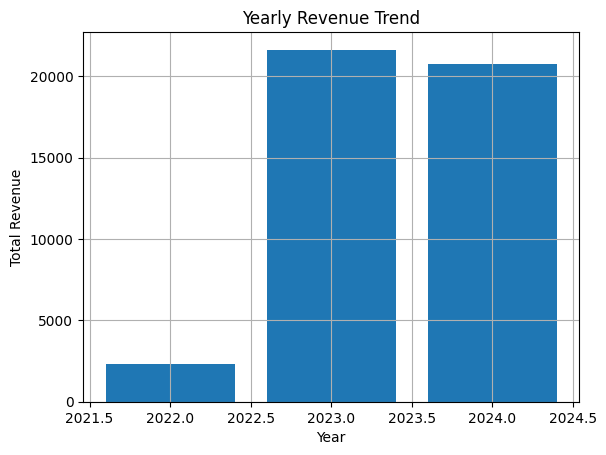

In [42]:
plt.bar(yearly_revenue.index.to_list(), yearly_revenue.to_list())
plt.title('Yearly Revenue Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)

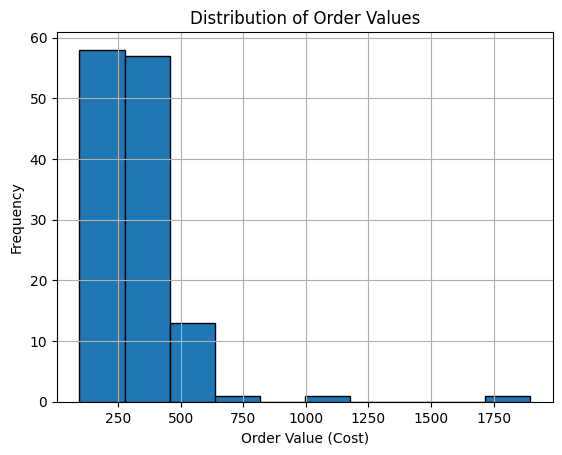

In [91]:
#What is the distribution of order values (histogram)?
plt.hist(success_order['Cost'], bins=10, edgecolor='black')
plt.title('Distribution of Order Values')
plt.xlabel('Order Value (Cost)')
plt.ylabel('Frequency')
plt.grid(True)


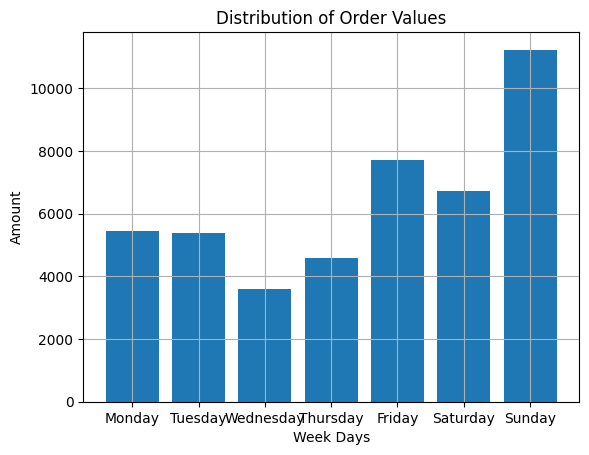

In [93]:
#Which day of the week has the highest sales?
week_days = success_order.groupby("DayName").Cost.sum().reindex(days_order)
plt.bar(week_days.index.to_list(), week_days.to_list())
plt.title('Distribution of Order Values')
plt.xlabel('Week Days')
plt.ylabel('Amount')
plt.grid(True)
